In [135]:
import numpy as np
import pandas as pd

In [136]:
data = pd.read_csv(r"mobile_price_data.csv")
data.head(2)

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)",8999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)",8999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


In [137]:
data['mp_speed'] = data['mp_speed'].str.replace('GHz','').astype('float64')
data['int_memory'] = data['int_memory'].str.replace('GB','').astype('int64')
data['battery_power'] = data['battery_power'].str.replace('mAh','').astype('int64')
data['mob_width'] = data['mob_width'].str.replace('mm','').astype('float64')

In [138]:
data['mob_height'] = data['mob_height'].str.replace('mm','').astype('float64')
data['mob_depth'] = data['mob_depth'].str.replace('mm','').astype('float64')
data['mob_weight'] = data['mob_weight'].str.replace('g','').astype('float64')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mobile_name    459 non-null    object 
 1   mobile_price   459 non-null    int64  
 2   mobile_color   459 non-null    object 
 3   dual_sim       459 non-null    object 
 4   disp_size      459 non-null    object 
 5   resolution     459 non-null    object 
 6   os             459 non-null    object 
 7   num_cores      459 non-null    object 
 8   mp_speed       459 non-null    float64
 9   int_memory     459 non-null    int64  
 10  ram            459 non-null    object 
 11  p_cam          459 non-null    object 
 12  f_cam          459 non-null    object 
 13  network        459 non-null    object 
 14  bluetooth      459 non-null    object 
 15  battery_power  459 non-null    int64  
 16  mob_width      459 non-null    float64
 17  mob_height     459 non-null    float64
 18  mob_depth 

In [140]:
data.isnull().sum()

mobile_name      0
mobile_price     0
mobile_color     0
dual_sim         0
disp_size        0
resolution       0
os               0
num_cores        0
mp_speed         0
int_memory       0
ram              0
p_cam            0
f_cam            0
network          0
bluetooth        0
battery_power    0
mob_width        0
mob_height       0
mob_depth        0
mob_weight       0
dtype: int64

In [141]:
data.corr()['mobile_price']

mobile_price     1.000000
mp_speed         0.617347
int_memory       0.756921
battery_power   -0.012884
mob_width        0.079330
mob_height       0.090951
mob_depth       -0.112767
mob_weight       0.375185
Name: mobile_price, dtype: float64

In [142]:
## Remove: battery_power, mob_width, mob_height, mob_depth

In [143]:
data['mobile_name'].value_counts()

Vivo Z1Pro (Sonic Black, 64 GB)           4
Vivo U10 (Thunder Black, 64 GB)           4
Vivo U10 (Electric Blue, 64 GB)           3
Mi A2 (Red, 64 GB)                        3
Redmi Note 5 Pro (Black, 64 GB)           3
                                         ..
Redmi K20 (Flame Red, 64 GB)              1
Redmi Note 7 (Sapphire Blue, 32 GB)       1
Redmi Y3 (Prime Black, 32 GB)             1
Redmi Y3 (Elegant Blue, 32 GB)            1
OPPO Reno 10x Zoom (Jet Black, 128 GB)    1
Name: mobile_name, Length: 363, dtype: int64

In [144]:
data['mobile_company'] = data['mobile_name'].apply(lambda x:" ".join(x.split()[0:1]))

In [145]:
data['mobile_company'].value_counts()

Vivo       96
Redmi      93
OPPO       86
Realme     79
Infinix    36
POCO       31
Mi         20
Samsung    17
MI3         1
Name: mobile_company, dtype: int64

In [146]:
data = data[data['mobile_company'] != 'MI3']

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 458
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mobile_name     458 non-null    object 
 1   mobile_price    458 non-null    int64  
 2   mobile_color    458 non-null    object 
 3   dual_sim        458 non-null    object 
 4   disp_size       458 non-null    object 
 5   resolution      458 non-null    object 
 6   os              458 non-null    object 
 7   num_cores       458 non-null    object 
 8   mp_speed        458 non-null    float64
 9   int_memory      458 non-null    int64  
 10  ram             458 non-null    object 
 11  p_cam           458 non-null    object 
 12  f_cam           458 non-null    object 
 13  network         458 non-null    object 
 14  bluetooth       458 non-null    object 
 15  battery_power   458 non-null    int64  
 16  mob_width       458 non-null    float64
 17  mob_height      458 non-null    flo

In [148]:
data = data.drop('mobile_name', axis=1)

In [149]:
data.head(3)

,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight,mobile_company
0,8999,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
1,8999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,32,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme
2,9999,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2.0,64,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000,75.0,164.4,8.95,195.0,Realme


In [150]:
data = data.drop(['resolution','p_cam','f_cam','network'], axis=1)

In [151]:
data['disp_size'] = data['disp_size'].apply(lambda x:" ".join(x.split()[0:1]))

In [152]:
data['disp_size'] = data['disp_size'].astype('float64')

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 458
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mobile_price    458 non-null    int64  
 1   mobile_color    458 non-null    object 
 2   dual_sim        458 non-null    object 
 3   disp_size       458 non-null    float64
 4   os              458 non-null    object 
 5   num_cores       458 non-null    object 
 6   mp_speed        458 non-null    float64
 7   int_memory      458 non-null    int64  
 8   ram             458 non-null    object 
 9   bluetooth       458 non-null    object 
 10  battery_power   458 non-null    int64  
 11  mob_width       458 non-null    float64
 12  mob_height      458 non-null    float64
 13  mob_depth       458 non-null    float64
 14  mob_weight      458 non-null    float64
 15  mobile_company  458 non-null    object 
dtypes: float64(6), int64(3), object(7)
memory usage: 60.8+ KB


In [154]:
data = data.drop('mobile_color', axis=1)

In [155]:
data['os'] = data['os'].apply(lambda x:" ".join(x.split()[0:2]))

In [156]:
data['ram'] = data['ram'].str.replace('GB','').astype('int64')

In [157]:
data = data.drop('bluetooth', axis=1)

In [158]:
data.head()

,mobile_price,dual_sim,disp_size,os,num_cores,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,mobile_company
0,8999,Dual Sim,16.56,Android 10,Octa Core,2.0,32,3,5000,75.0,164.4,8.95,195.0,Realme
1,8999,Dual Sim,16.56,Android 10,Octa Core,2.0,32,3,5000,75.0,164.4,8.95,195.0,Realme
2,9999,Dual Sim,16.56,Android 10,Octa Core,2.0,64,4,5000,75.0,164.4,8.95,195.0,Realme
3,9999,Dual Sim,16.56,Android 10,Octa Core,2.0,64,4,5000,75.0,164.4,8.95,195.0,Realme
4,11999,Dual Sim,16.51,Android 10,Octa Core,2.0,128,4,5000,75.4,164.4,9.00,199.0,Realme


In [159]:
data['num_cores'].value_counts()

Octa Core      444
Quad Core       13
Single Core      1
Name: num_cores, dtype: int64

In [160]:
data = data[data['num_cores'] != 'Single Core']

In [161]:
data.shape

(457, 14)

In [162]:
data_final = pd.get_dummies(data)

In [163]:
data_final.head()

,mobile_price,disp_size,mp_speed,int_memory,ram,battery_power,mob_width,mob_height,mob_depth,mob_weight,...,num_cores_Octa Core,num_cores_Quad Core,mobile_company_Infinix,mobile_company_Mi,mobile_company_OPPO,mobile_company_POCO,mobile_company_Realme,mobile_company_Redmi,mobile_company_Samsung,mobile_company_Vivo
0,8999,16.56,2.0,32,3,5000,75.0,164.4,8.95,195.0,...,1,0,0,0,0,0,1,0,0,0
1,8999,16.56,2.0,32,3,5000,75.0,164.4,8.95,195.0,...,1,0,0,0,0,0,1,0,0,0
2,9999,16.56,2.0,64,4,5000,75.0,164.4,8.95,195.0,...,1,0,0,0,0,0,1,0,0,0
3,9999,16.56,2.0,64,4,5000,75.0,164.4,8.95,195.0,...,1,0,0,0,0,0,1,0,0,0
4,11999,16.51,2.0,128,4,5000,75.4,164.4,9.00,199.0,...,1,0,0,0,0,0,1,0,0,0


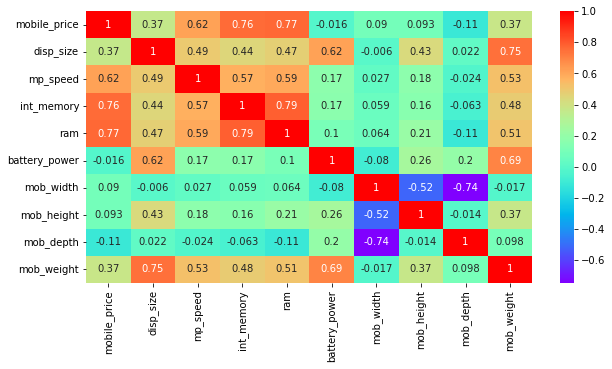

In [164]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True, cmap="rainbow")
plt.show()

In [165]:
x = data_final.drop('mobile_price', axis=1)
y = data_final['mobile_price']

In [166]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [167]:
x_train.shape, x_test.shape

((342, 26), (115, 26))

In [168]:
def model_accuracy(model):
    model.fit(x_train, y_train)
    acc = model.score(x_test, y_test)
    print(str(model)+"--->"+ str(acc))

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_accuracy(lr)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_accuracy(knn)

from sklearn.svm import SVC
svm = SVC()
model_accuracy(svm)

from sklearn.linear_model import Lasso
las = Lasso()
model_accuracy(las)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_accuracy(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_accuracy(rf)

LinearRegression()--->0.7029574532653475
KNeighborsClassifier()--->0.2956521739130435
SVC()--->0.02608695652173913
Lasso()--->0.7038171457621922
DecisionTreeRegressor()--->0.8711117167127557
RandomForestRegressor()--->0.9169377526382039


In [175]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 356, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_, n_samples)
KeyError: 'gini'

--------

KeyError: 'gini'